In [1]:
import os
import librosa
import pandas as pd

# Function to extract features from an audio file
def extract_features(file_path):
    # Example: Use librosa to extract MFCC features
    audio, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Example: Calculate mean of MFCCs
    mfccs_mean = mfccs.mean(axis=1)

    return mfccs_mean

# Directory path where your dataset is located
dataset_path = '../data/phone_audio'

# Initialize lists to store data
data = []
labels = []

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    # Iterate through each audio file in the class folder
    for audio_file in os.listdir(class_path):
        audio_path = os.path.join(class_path, audio_file)

        # Extract features from the audio file
        features = extract_features(audio_path)

        # Append features and corresponding label to the lists
        data.append(features)
        labels.append(class_folder)

# Create a DataFrame from the lists
df = pd.DataFrame(data, columns=[f'mfcc_{i}' for i in range(len(data[0]))])
df['label'] = labels


C:\Users\burjo\AppData\Local\Temp\ipykernel_6932\2126119763.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
c:\Users\burjo\miniconda3\envs\speech\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\burjo\AppData\Local\Temp\ipykernel_6932\2126119763.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
c:\Users\burjo\miniconda3\envs\speech\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [2]:
df.sample(10)

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,label
9,-563.938354,46.551987,11.386193,32.098862,-13.779985,12.690765,-11.849097,-3.316983,-6.033904,-4.784625,-5.430435,-12.942038,-0.666156,news
49,-927.604492,31.839355,0.606599,14.832740,-16.549433,8.282722,-8.151918,-0.628275,-1.768205,-4.368038,2.167351,-3.581484,-2.080770,tomorrow
20,-508.538666,47.457878,2.019779,27.509256,-14.852584,14.392709,-10.994548,-3.840610,-3.452964,-6.041146,-4.978927,-13.785985,-4.742826,today
11,-526.992371,49.712952,6.970574,29.998161,-17.182613,9.953844,-16.721336,-1.788740,-7.624277,-8.074083,-3.550033,-14.859735,-1.452477,news
45,-550.919556,55.589935,-4.502281,28.131691,-24.202475,20.887285,-17.527405,3.202453,-11.079260,-5.142259,1.074378,-12.150620,4.712708,tomorrow
0,-525.652832,47.839470,19.595663,29.092270,-15.985587,9.451974,-14.782973,-1.330505,-8.556858,-7.223614,-5.290502,-14.192139,1.000121,news
2,-735.506287,27.428638,12.370101,26.373968,-16.622059,15.850830,-18.076504,-0.454983,-5.590636,-8.696020,-3.131897,-8.809321,-1.880910,news
27,-581.109253,42.633556,3.914512,29.943420,-13.101288,12.708442,-11.334865,-0.412035,-6.708214,-7.682545,-2.392028,-12.425644,-3.002697,today
4,-552.291931,37.440662,11.957325,31.224409,-12.762480,13.227860,-11.628553,1.095689,-4.403710,-5.565827,-1.799057,-11.506128,-1.086122,news
23,-491.231110,53.650742,1.160906,22.897778,-18.961878,12.660271,-14.603011,-1.512756,-4.043606,-7.921235,-3.427465,-10.546329,-2.546816,today


In [3]:
from sklearn.model_selection import train_test_split

# Data is in a DataFrame df with columns as features and a 'label' column for the class labels
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create a pipeline with a classifier (Random Forest) and a scaler (StandardScaler)
model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


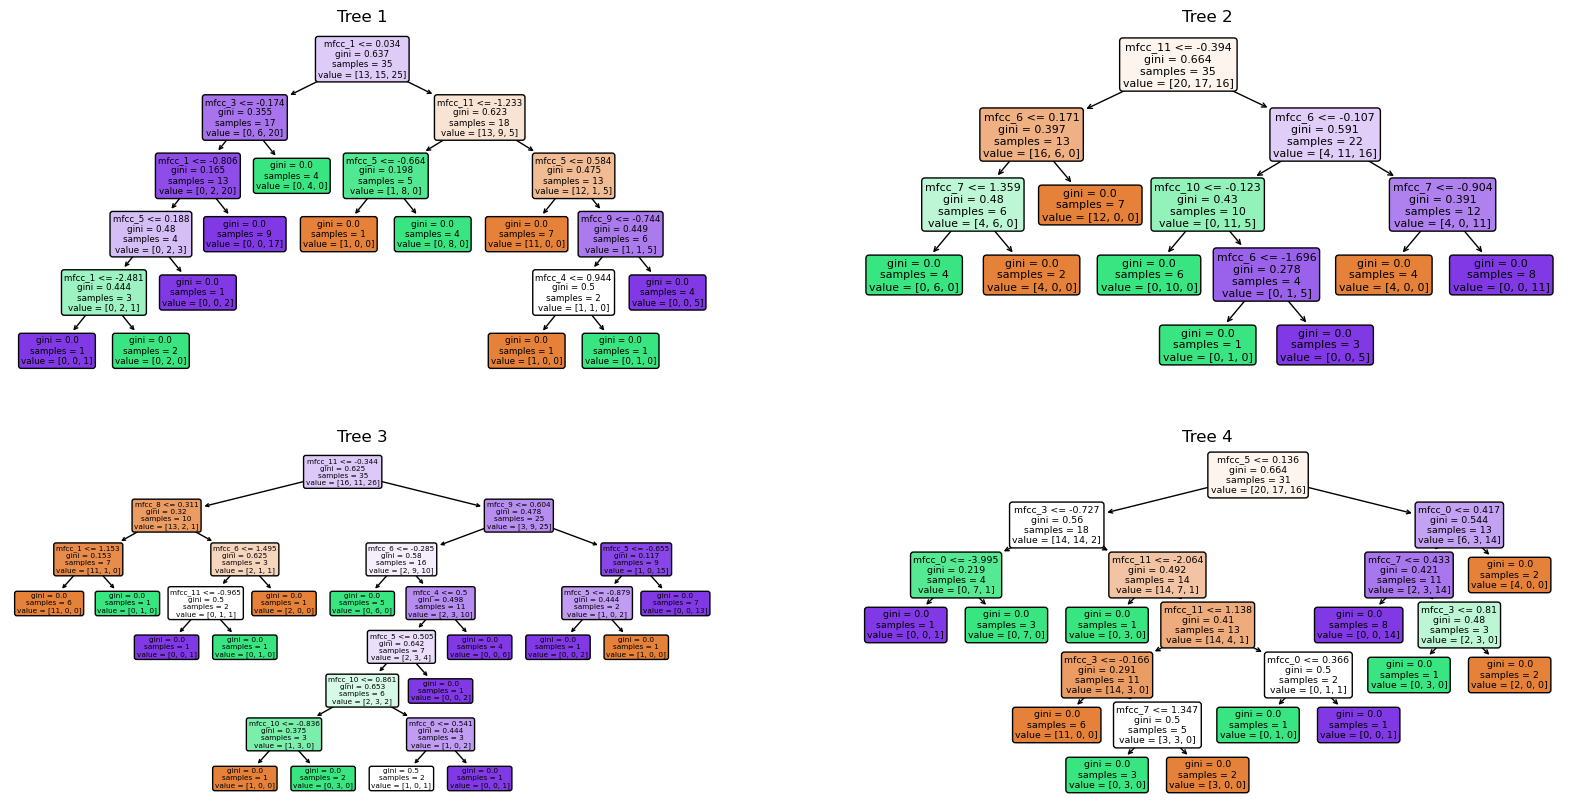

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


rf_classifier = model.named_steps['randomforestclassifier']

# Access individual decision trees
individual_trees = rf_classifier.estimators_
# Assuming you have a trained RandomForestClassifier called 'rf_classifier'
plt.figure(figsize=(20, 10))
for i, tree in enumerate(individual_trees[:4]):
    plt.subplot(2, 2, i + 1)  # Change the subplot parameters as needed
    plot_tree(tree, filled=True, feature_names=X_train.columns, rounded=True)
    plt.title(f'Tree {i + 1}')

plt.show()


In [5]:
import numpy as np
from sklearn.metrics import classification_report

# ... (previous code for model training)

# Make predictions on the test set
# y_pred_probs = 
y_pred = model.predict(X_test)

# Decode numerical labels back to strings
# y_test_decoded = label_encoder.inverse_transform(y_test)
# y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        news       1.00      1.00      1.00         4
       today       1.00      1.00      1.00         2
    tomorrow       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [6]:
import joblib

# Assuming 'model' is your trained classifier
tabular_model = model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(tabular_model, '../app/models/tabular_phone_model.joblib')

['../app/models/tabular_phone_model.joblib']

: 

In [13]:
audio, sr = librosa.load('../data/audio/today/mp3-output-ttsfree(dot)com (1).mp3')
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Example: Calculate mean of MFCCs
mfccs_mean = [mfccs.mean(axis=1)]

features = pd.DataFrame(mfccs_mean, columns=[f'mfcc_{i}' for i in range(len(mfccs_mean[0]))])

loaded_tabular_model = joblib.load('../app/models/tabular_model.joblib')

predictions = loaded_tabular_model.predict(features)

predictions[0]

'today'

: 